<h1> ARBNB </h1>
<hr>

Este es el notebook donde se desarrollará el caso de negocio para ARBNB. A continuación se realiza la carga de los módulos requeridos para el desarrollo del proyecto.

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import re
import datetime as dt
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score
import statsmodels.api as sm

Se realiza la carga de la base de datos:

In [220]:
df = pd.read_excel("muestra_airbnb_nyc.xlsx")

In [221]:
df.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


Esta base de datos cuenta con un total de 3.017 registros, de los cuales, se tienen 82 variables.

In [222]:
df["year"] = df["host_since"].apply(lambda x: dt.datetime.utcfromtimestamp((x - 25569) * 86400.0).year if pd.notna(x) else x)
df["month"] = df["host_since"].apply(lambda x: dt.datetime.utcfromtimestamp((x - 25569) * 86400.0).month if pd.notna(x) else x)
df["street"] = df["street"].apply(
    lambda x: re.sub("Elmhurts|Elmhutst", "Elmhurst",
              re.sub("^N.+", "New York",
              re.sub(",\s*\w*\s*\w*", "",       
              re.sub("(\s*)$|^(\s+)", "",
              re.sub("(,\s+Ny)$", "",
              re.sub(",\s+United States", "", x.title()))))))
    )

In [223]:
df.drop(['host_id','name', 'summary', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'house_rules', 'neighbourhood',  'street', 'host_since',
         'property_type', 'bed_type', 'amenities', 'calendar_updated', 'has_availability', 'check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
         'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly',
         'parking', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
         'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable', 'random', 'latitude', 'longitude','host_response_rate', 'host_is_superhost',
         'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'availability_30',
         'availability_60', 'availability_90', 'availability_365','calculated_host_listings_count',
         'calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms',
         'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
         'year', 'month'], axis = 1, inplace=True)

df.columns

Index(['id', 'host_response_time', 'host_listings_count',
       'host_identity_verified', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [224]:
df_Numbers = pd.get_dummies(df.drop(['id'], axis=1)).fillna(0)

In [233]:
index = []
sil_score = []
davies_score = []
for i in range(2,16):
    index.append(i)
    sil_score.append(np.round(silhouette_score(df_Numbers, KMeans(n_clusters=i, n_init='auto').fit_predict(df_Numbers)), 3))
    davies_score.append(np.round(davies_bouldin_score(df_Numbers, KMeans(n_clusters=i, n_init='auto').fit_predict(df_Numbers)), 3))

pd.DataFrame({"Grupos":index, "Silhouette Score":sil_score, "Davies Bouldin Score":davies_score}).sort_values("Davies Bouldin Score", ascending=True)

,Grupos,Silhouette Score,Davies Bouldin Score
7,9,0.455,0.591
8,10,0.456,0.631
9,11,0.535,0.644
4,6,0.523,0.647
6,8,0.528,0.650
12,14,0.422,0.686
1,3,0.523,0.710
13,15,0.409,0.714
5,7,0.538,0.730
3,5,0.433,0.738


In [288]:
df["Kmeans"] = KMeans(n_clusters=6, n_init='auto').fit_predict(df_Numbers)
df["host_identity_verified"] = pd.Categorical(df["host_identity_verified"])

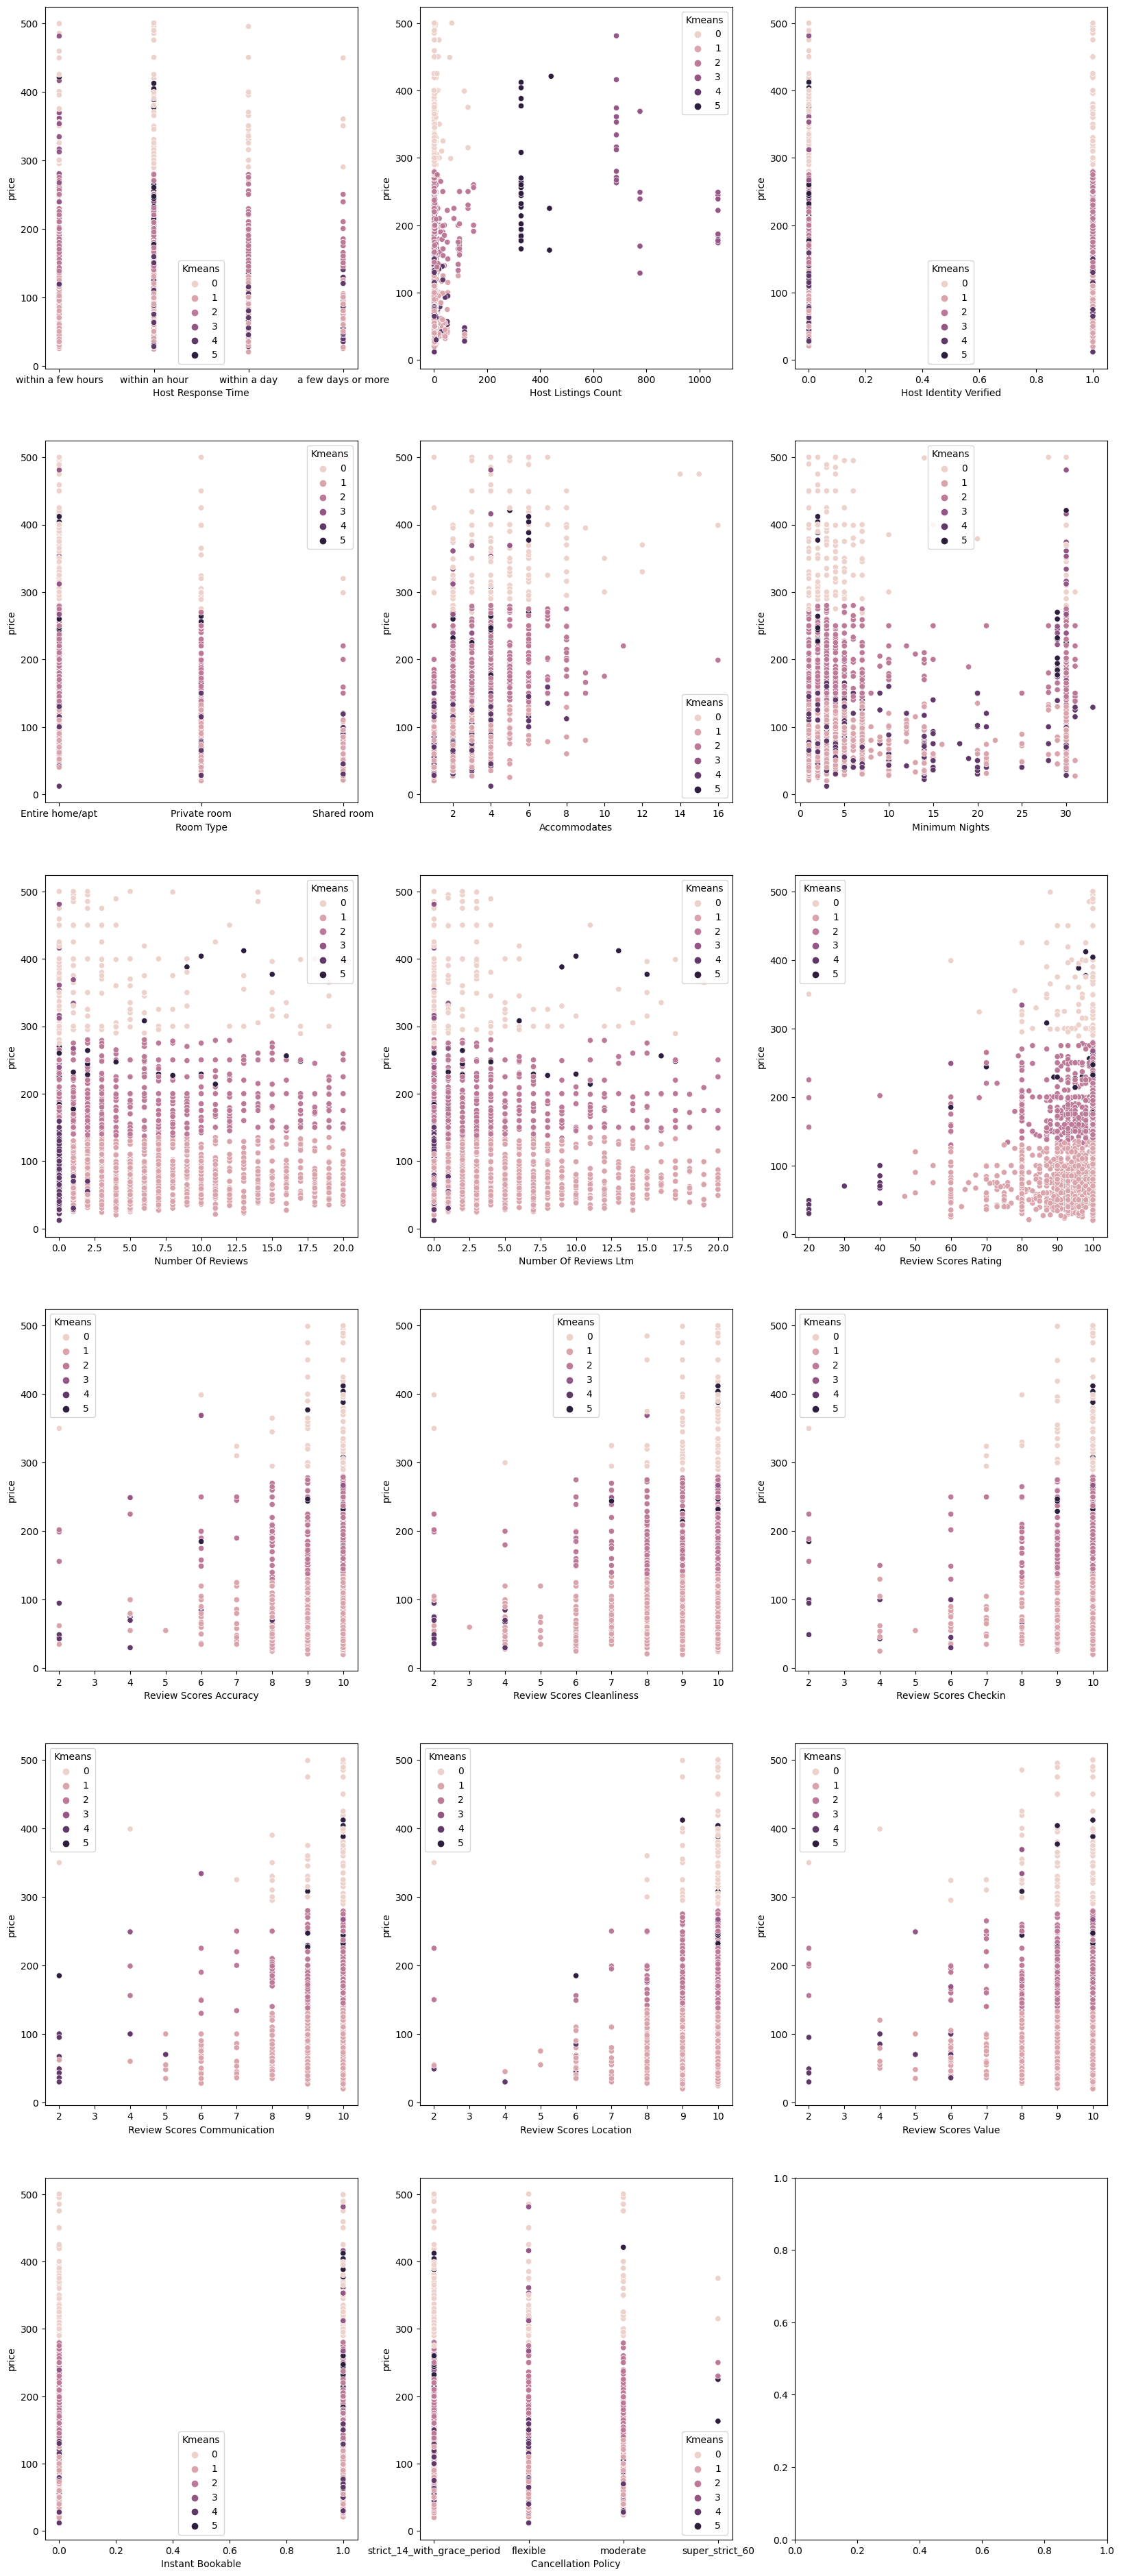

In [289]:
Variables = []
for j in range(6):
    d = []
    for k in range(3):
        if len(df.columns.drop(["id", "price", "Kmeans"])) > j*3+k:
            d.append(df.columns.drop(["id", "price", "Kmeans"])[j*3+k])
        else:
            d.append(',')
    Variables.append(d)

fig, ax = plt.subplot_mosaic(Variables, figsize = (20, 48))

for i in df.columns.drop(["id", "price", "Kmeans"]):
    sns.scatterplot(data = df, x = i, y = "price", hue="Kmeans", ax = ax[i])
    ax[i].set_xlabel(re.sub("_", " ", i).title())

In [262]:
3 % 5

3

<AxesSubplot: xlabel='review_scores_rating', ylabel='price'>

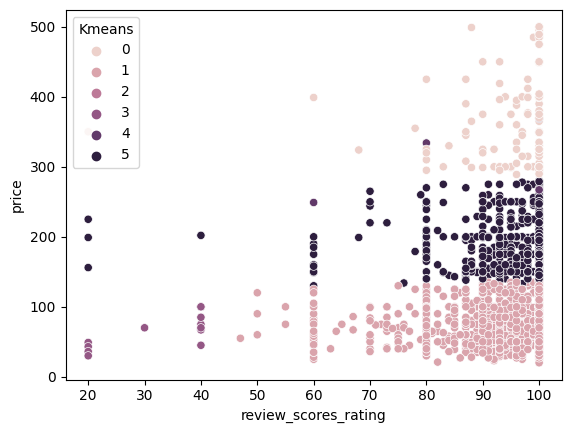

In [241]:
sns.scatterplot(y = "price", x = "review_scores_rating", hue = "Kmeans", data=df)

C:\Users\dags0\AppData\Local\Temp\ipykernel_21636\2325111341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(["id", "Kmeans"], axis=1).corr(), annot=True, ax = ax, fmt=".2f")


<AxesSubplot: >

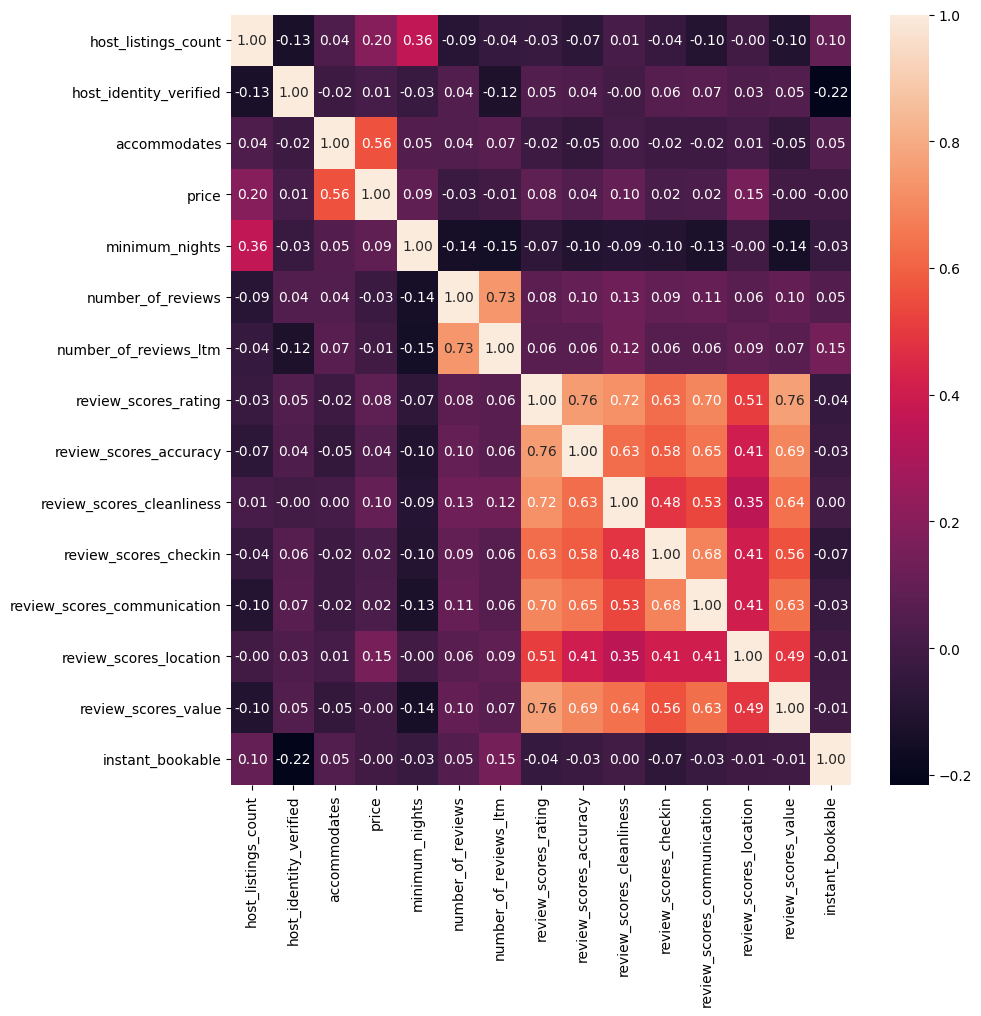

In [254]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.heatmap(df.drop(["id", "Kmeans"], axis=1).corr(), annot=True, ax = ax, fmt=".2f")
